## Finding cheaters who climd ELO too fast using the Q-Q plot for finding outliers

Data in CVS format is takes fomr a GitHub repo: https://github.com/JGravier/chessplayers

As our world becomes more and more competitive, for many it seems the easy way to just cheat.  
Either the old fashioned way with a microphone in the ear or by simply copying a machine.  
Cheating is evolving as are the ways of detecting it.  
  
I will try to find if in the dataset "ranking_chessplayers_1851_2001.csv" which consists of the changes in ELO  
over twenty years anyone's ELO has changes to such a degree that it would be an outlier in the data.  
For that I will use the Q-Q plot which shows us is the data fits the distribution.  
  
As a general assumption I will set the growth rate threshhold at 50, which is the normal growth in ELO  
we can expect of high ranking players.

**PREPARING THE DATA**

In [69]:
import pandas as pd
import numpy as np

# Because of weird names we try reading with ISO-8859-1 encoding
try:
    df = pd.read_csv("ranking_chessplayers_1851_2001.csv", encoding='ISO-8859-1', skipinitialspace=True)
except UnicodeDecodeError:
    # If ISO-8859-1 doen't work we try with cp1252
    df = pd.read_csv("ranking_chessplayers_1851_2001.csv", encoding='cp1252', skipinitialspace=True)

# We convert the data into a dict with the playername as the key and the ratings in the form of a numpyarray as the value.
players_dict = df.groupby('Player')['Rating'].apply(lambda x: np.array(x.tolist())).to_dict()


**Q-Q plot**

With the Q-Q plot we can see if the values do indeed follow the way data is distributed in the dataset.  
Outliers would overperform the distribution and would we quickly visible.

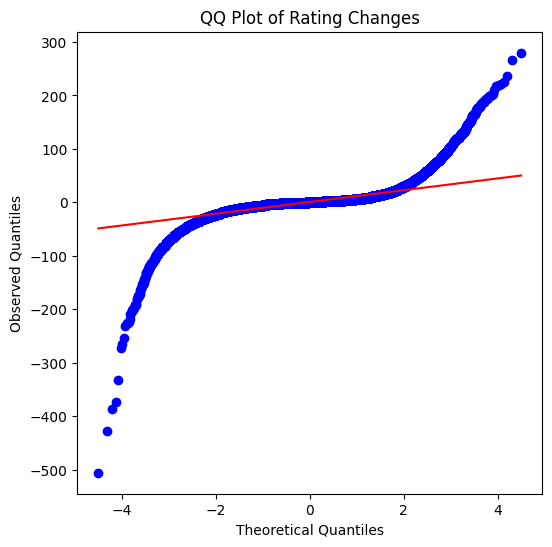

In [70]:
import matplotlib.pyplot as plt
from scipy import stats

# Make sure to sort by 'Player' and 'dateranking' if not already sorted
df = pd.read_csv("ranking_chessplayers_1851_2001.csv", encoding='ISO-8859-1', skipinitialspace=True)
df['dateranking'] = pd.to_datetime(df['dateranking'])  # Convert 'dateranking' to datetime
df = df.sort_values(by=['Player', 'dateranking'])

# Calculate the change in ratings
df['RatingChange'] = df.groupby('Player')['Rating'].diff().fillna(0)

# Remove the entries with no change (initial entries per player)
rating_changes = df['RatingChange'][df['RatingChange'] != 0]

# Generating the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(rating_changes, dist="norm", plot=ax)
plt.title('QQ Plot of Rating Changes')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Quantiles')

# Show the plot
plt.show()


We can clearly see that the distribution isn't normal so we try with uniform distribution.

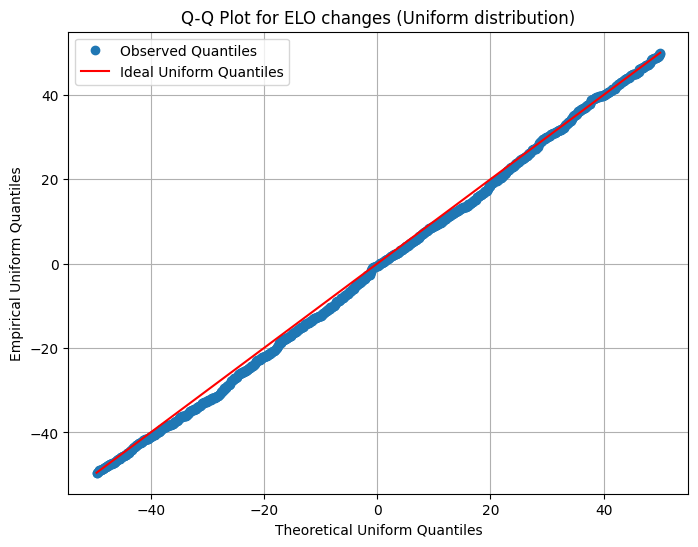

In [71]:
# Generate sample data for EloChange assuming a uniform distribution
np.random.seed(42)
df = pd.DataFrame({'EloChange': np.random.uniform(-50, 50, 1000)})

# Calculate quantiles from a uniform distribution
uniform_quantiles = np.linspace(start=min(df['EloChange']), stop=max(df['EloChange']), num=1000)

# Calculate empirical quantiles by sorting the EloChange values
empirical_quantiles = np.sort(df['EloChange'])

# Generate a Q-Q plot for a uniform distribution
plt.figure(figsize=(8, 6))
plt.plot(uniform_quantiles, empirical_quantiles, 'o', label='Observed Quantiles')  # Plot the observed quantiles
plt.plot(uniform_quantiles, uniform_quantiles, 'r-', label='Ideal Uniform Quantiles')  # Plot the line for ideal uniform quantiles
plt.title('Q-Q Plot for ELO changes (Uniform distribution)')
plt.xlabel('Theoretical Uniform Quantiles')
plt.ylabel('Empirical Uniform Quantiles')
plt.legend()
plt.grid(True)
plt.show()


Here we can see the the ELO changes are indeed uniformly distributed.  
That means that there is no clusterirng around the mean and that factors like a player's strength or  
game conditions don't play a big role.  
Since our data is made from high ranking chess players, we can deduce that the players are quite close in competence.

**CONCLUSION**  
We can conclude that our dataset is made of highly ranked chess players whose change in ELO doesn't seem indicative of cheating.  
Modern cheating in chess is quite suffisticated as are the methods of detectitng it, which while instresting are way more complicated.  
  
In the future as cheating in chess and various other games will evolve so will the way of figuring them out.